# Task 1 - 4

# Importing Libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Loading Dataset

In [30]:
data = pd.read_csv('Mall_Customers.csv')

print("Dataset Head:\n", data.head())
print("\nDataset Info:\n")
print(data.info())
print("\nSummary Statistics:\n", data.describe())

Dataset Head:
    CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Summary Statistics:

#Pre-processing

Missing Values

In [31]:
# Checking for missing values
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


Dropping unnecessary features

In [32]:
# Dropping 'CustomerID' column as it is not needed for analysis or model training
data.drop(columns=['CustomerID'], inplace=True)

Label encoding

In [34]:
#Fixing misspelling
data.rename(columns={'Genre': 'Gender'}, inplace=True)

In [35]:

# Label Encoding
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])



Feature Scaling

In [36]:
# Feature Scaling
scaler = StandardScaler()
data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(
    data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

print("\nPreprocessed Data Head:\n", data.head())


Preprocessed Data Head:
    Gender       Age  Annual Income (k$)  Spending Score (1-100)
0       1 -1.424569           -1.738999               -0.434801
1       1 -1.281035           -1.738999                1.195704
2       0 -1.352802           -1.700830               -1.715913
3       0 -1.137502           -1.700830                1.040418
4       0 -0.563369           -1.662660               -0.395980


# Unsupervised Learning

In [37]:
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


K Mean Clustering

In [38]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

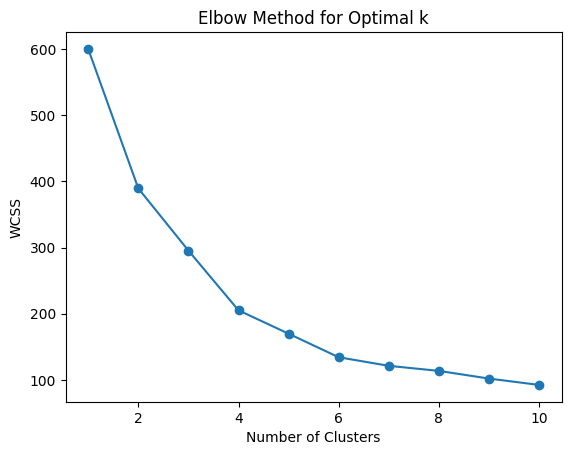

In [39]:
# Plotting the Elbow Graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [40]:
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, data['Cluster'])
print(f'Silhouette Score for K-Means: {silhouette_avg:.2f}')

print("\nData with Cluster Labels:\n", data.head())

Silhouette Score for K-Means: 0.41

Data with Cluster Labels:
    Gender       Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0       1 -1.424569           -1.738999               -0.434801        2
1       1 -1.281035           -1.738999                1.195704        2
2       0 -1.352802           -1.700830               -1.715913        3
3       0 -1.137502           -1.700830                1.040418        2
4       0 -0.563369           -1.662660               -0.395980        2


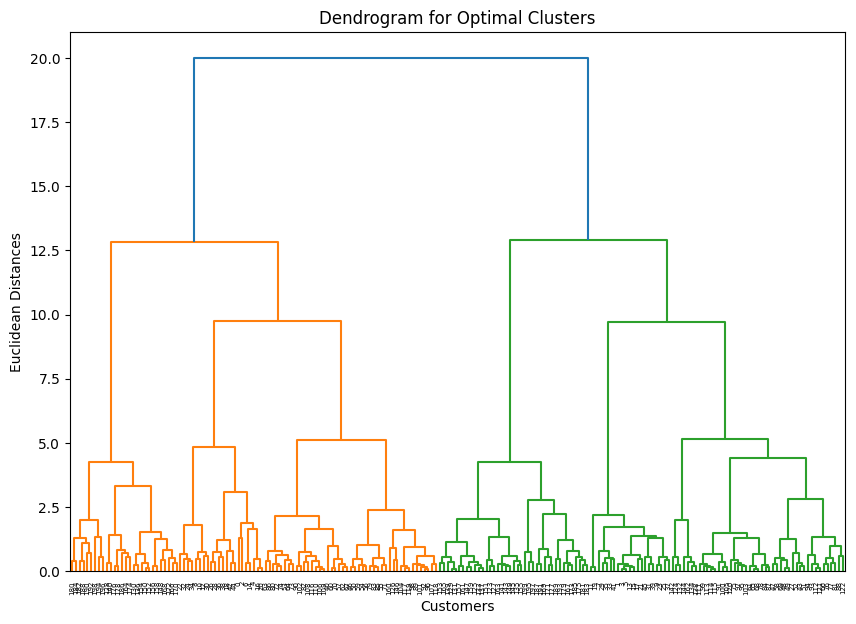

In [41]:
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram for Optimal Clusters')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()


In [42]:

# Applying Agglomerative Clustering with the optimal number of clusters (e.g., 5 from dendrogram)
agg_cluster = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
data['Agglomerative_Cluster'] = agg_cluster.fit_predict(X)




In [43]:
# Calculate Silhouette Score for Agglomerative Clustering
silhouette_avg_agg = silhouette_score(X, data['Agglomerative_Cluster'])
print(f'Silhouette Score for Agglomerative Clustering: {silhouette_avg_agg:.2f}')


Silhouette Score for Agglomerative Clustering: 0.39


In [44]:

# Displaying the first few rows with the new cluster labels
print("\nData with Agglomerative Cluster Labels:\n", data.head())


Data with Agglomerative Cluster Labels:
    Gender       Age  Annual Income (k$)  Spending Score (1-100)  Cluster  \
0       1 -1.424569           -1.738999               -0.434801        2   
1       1 -1.281035           -1.738999                1.195704        2   
2       0 -1.352802           -1.700830               -1.715913        3   
3       0 -1.137502           -1.700830                1.040418        2   
4       0 -0.563369           -1.662660               -0.395980        2   

   Agglomerative_Cluster  
0                      4  
1                      0  
2                      4  
3                      0  
4                      4  


# Silhouette Score

K Mean: 0.36
Agglomerative Clustering: 0.44

# Feature Selection

Using Recursive Feature Elimination (RFE)

In [46]:
X = data.drop(columns=['Cluster'])
y = data['Cluster']



In [47]:
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=2)
X_selected = rfe.fit_transform(X, y)



In [48]:
print("Selected Features (Based on RFE):", rfe.support_)
print("Feature Ranking:", rfe.ranking_)

Selected Features (Based on RFE): [False False  True  True False]
Feature Ranking: [4 2 1 1 3]


New CSV file with the selected features only

In [49]:
selected_features = X.columns[rfe.support_]

data_selected = data[selected_features]

data_selected.to_csv('selected_features.csv', index=False)

print("New CSV file with selected features saved as 'selected_features.csv'.")

New CSV file with selected features saved as 'selected_features.csv'.


# Supervised Leanring

Before Moving to Supervised Learning, we have to add a target class for the classifiers to predict as the orignal dataset does not have such feature, we will add it using clustering.

In [58]:
data = pd.read_csv('selected_features.csv')

X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

agg_cluster = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
data['Agglomerative_Cluster'] = agg_cluster.fit_predict(X)

print(data.head())


   Annual Income (k$)  Spending Score (1-100)  Agglomerative_Cluster
0           -1.738999               -0.434801                      4
1           -1.738999                1.195704                      3
2           -1.700830               -1.715913                      4
3           -1.700830                1.040418                      3
4           -1.662660               -0.395980                      4


Now, we have "Customer Segmeent" as our target for classification